# Team 5 - Global Terrorism

![](https://www.start.umd.edu/gtd/images/START_GlobalTerrorismDatabase_TerroristAttacksConcentrationIntensityMap_45Years.png)

_For more information about the dataset, read [here](https://www.kaggle.com/START-UMD/gtd)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- Use `encoding ='ISO-8859-1'` when reading the .csv file
- There are many columns that are not really helpful for us. Can you identify and drop them?
- Can you draw a map of terrorism event locations?
- And more...

In [0]:
# Start your codes here!

## **CLEANING THE DATA**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!ls gdrive/"My Drive"/data-science/terrorism.csv

'gdrive/My Drive/data-science/terrorism.csv'


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [151]:
path_csv = 'gdrive/My Drive/data-science/terrorism.csv'
terr = pd.read_csv(path_csv, encoding='ISO-8859-1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
terr.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [53]:
terr.sample(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
130804,201404240018,2014,4,24,NaN,0,NaN,95,Iraq,10,Middle East & North Africa,Nineveh,Ayn al-Jahesh,35.99588,42.829136,1.0,0,NaN,04/24/2014: Assailants opened fire on a milita...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Iraqi Army,Checkpoint,...,NaN,NaN,NaN,4.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,It is unknown if an observation tower was dama...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casualty numbers for this incident conflict ac...,"""Al-Sharqiyah Roundup: 'Fierce Clashes' Erupt ...","""Iraq: Roundup of Security Incidents 22-28 Apr...","""Gunmen kill four soldiers in Mosul,"" National...",START Primary Collection,-9,-9,0,-9,NaN
87378,200806120024,2008,6,12,NaN,0,NaN,45,Colombia,3,South America,Tolima,San Antonio,3.91272,-75.475910,1.0,0,The rural sector of San Miguel in San Antionio...,"06/12/2008: On Thursday, the Revolutionary Arm...",1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,35.0,Military Transportation/Vehicle (excluding con...,Colombian Army,Army personnel,...,NaN,NaN,Three mines were used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The summary of this incident was based on arti...,"Agencia de Noticias Ejercito, ""Army Neutralize...","Ecos del Combeima, ""Two Landmines Discovered i...",NaN,ISVG,0,0,0,0,NaN


*There are many columns that are not really helpful, so I read some information in reference link. I found Codebook of this dataset, and found some specify meaning columns. *

In [152]:
clean_columns = ['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt', 'region', 'region_txt', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'target1', 'targtype1_txt', 'targtype1', 'natlty1', 'natlty1_txt', 'gname', 'guncertain', 'claimed', 'weaptype1', 'weaptype1_txt', 'nkill', 'nwound']
drop_columns = []
for col in terr.columns:
  if col not in clean_columns:
    drop_columns.append(col)
    
print(drop_columns != clean_columns)
terr.drop(columns=drop_columns, inplace=True)  

True


In [7]:
terr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 32 columns):
eventid            181691 non-null int64
iyear              181691 non-null int64
imonth             181691 non-null int64
iday               181691 non-null int64
extended           181691 non-null int64
country            181691 non-null int64
country_txt        181691 non-null object
region             181691 non-null int64
region_txt         181691 non-null object
city               181257 non-null object
latitude           177135 non-null float64
longitude          177134 non-null float64
specificity        181685 non-null float64
vicinity           181691 non-null int64
crit1              181691 non-null int64
doubtterr          181690 non-null float64
multiple           181690 non-null float64
success            181691 non-null int64
suicide            181691 non-null int64
attacktype1        181691 non-null int64
attacktype1_txt    181691 non-null object
targtype1     

In [13]:
terr.shape

(181691, 31)

In [14]:
terr.sample(5)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,city,longitude,specificity,vicinity,crit1,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,target1,natlty1,natlty1_txt,gname,claimed,weaptype1,weaptype1_txt,nkill,nwound
175915,201706140030,2017,6,14,0,4,Afghanistan,6,South Asia,Kabul,69.147011,1.0,0,1,0.0,0.0,1,0,3,Bombing/Explosion,20,Unknown,Unknown,NaN,NaN,Unknown,0.0,6,Explosives,0.0,0.0
166491,201608290045,2016,8,29,0,60,Egypt,10,Middle East & North Africa,Giza,31.185192,1.0,0,1,0.0,0.0,1,0,2,Armed Assault,3,Police,Checkpoint,60.0,Egypt,Muslim Brotherhood,0.0,5,Firearms,0.0,2.0
28757,198607260010,1986,7,26,0,159,Peru,3,South America,Chiclayo,-79.839420,1.0,0,1,-9.0,0.0,1,0,3,Bombing/Explosion,1,Business,American bank branch,159.0,Peru,Unknown,NaN,6,Explosives,0.0,0.0
78714,200508080001,2005,8,8,0,95,Iraq,10,Middle East & North Africa,Baiji,43.491413,1.0,0,1,0.0,0.0,1,0,2,Armed Assault,21,Utilities,Northern Oil Company employees in Baiji,95.0,Iraq,Unknown,0.0,5,Firearms,2.0,0.0
129243,201403240023,2014,3,24,0,95,Iraq,10,Middle East & North Africa,Mahmudiyah district,44.370626,3.0,0,1,0.0,0.0,1,0,3,Bombing/Explosion,14,Private Citizens & Property,Civilians,95.0,Iraq,Unknown,0.0,6,Explosives,1.0,0.0


In [153]:
# Check for NaN values
terr.isnull().sum().sort_values(ascending=False)

claimed            66120
nwound             16311
nkill              10313
longitude           4557
latitude            4556
natlty1_txt         1559
natlty1             1559
target1              636
city                 434
specificity            6
multiple               1
doubtterr              1
attacktype1            0
suicide                0
iyear                  0
imonth                 0
iday                   0
extended               0
country                0
country_txt            0
region                 0
region_txt             0
weaptype1_txt          0
weaptype1              0
gname                  0
targtype1_txt          0
vicinity               0
crit1                  0
targtype1              0
attacktype1_txt        0
success                0
eventid                0
dtype: int64

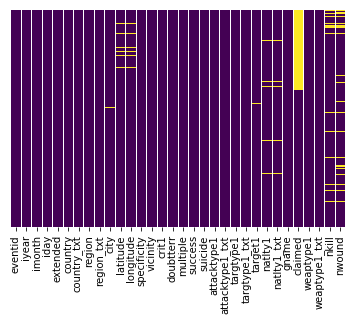

In [9]:
sns.heatmap(terr.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [0]:
# Clean Nan values
terr['claimed'].fillna(0, inplace=True)
terr['nwound'].fillna(0, inplace=True)
terr['nkill'].fillna(0, inplace=True)

In [0]:
terr.fillna('Unknown', inplace=True)

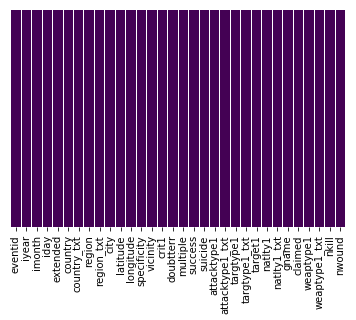

In [12]:
# Check NaN values again
sns.heatmap(terr.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [13]:
terr.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
extended           0
country            0
country_txt        0
region             0
region_txt         0
city               0
latitude           0
longitude          0
specificity        0
vicinity           0
crit1              0
doubtterr          0
multiple           0
success            0
suicide            0
attacktype1        0
attacktype1_txt    0
targtype1          0
targtype1_txt      0
target1            0
natlty1            0
natlty1_txt        0
gname              0
claimed            0
weaptype1          0
weaptype1_txt      0
nkill              0
nwound             0
dtype: int64

## **EDA**

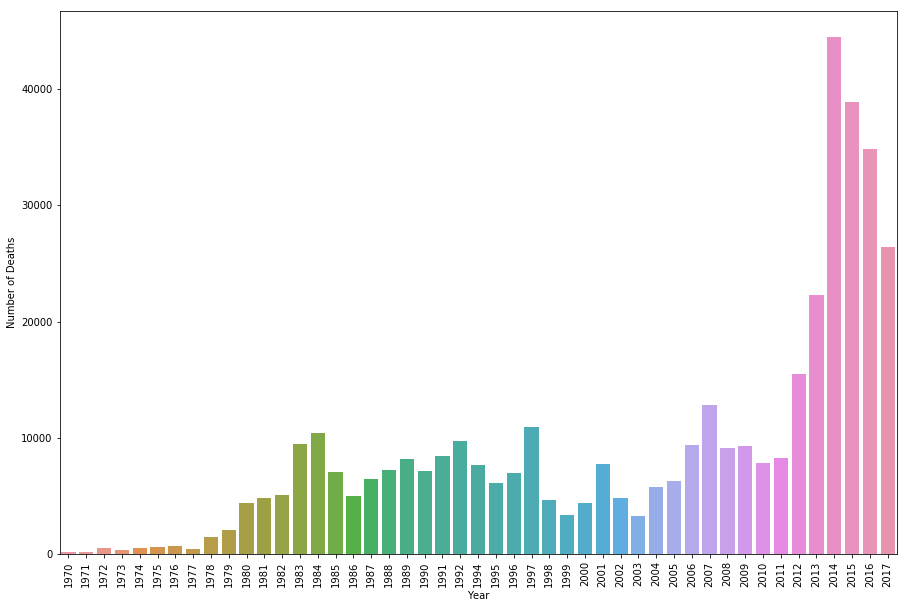

In [53]:
# Number of kills from 1970 to 2017
num_kills = terr.groupby('iyear')['nkill'].sum()
plt.subplots(figsize=(15,10))
plot1 = sns.barplot(num_kills.index,num_kills)
plot1.set_xlabel("Year")
plot1.set_ylabel("Number of Deaths")
plot1.set_xticklabels(num_kills.index,rotation=90)
plt.show()

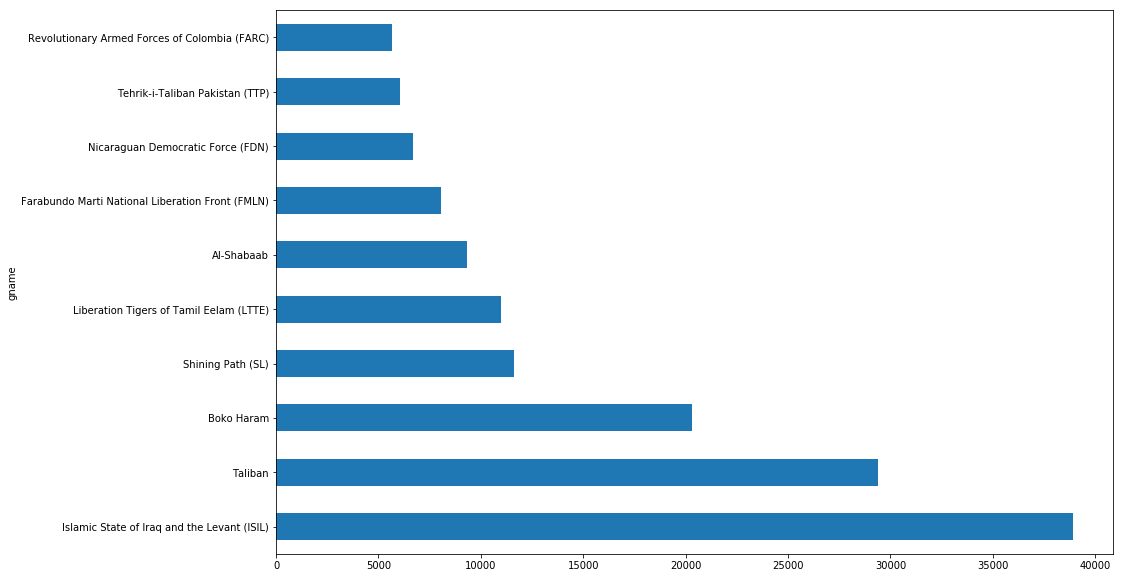

In [87]:
# Top 10 terrorist group with number of attacks
plt.subplots(figsize=(15,10))
terr[terr['gname'] != 'Unknown'].groupby('gname')['nkill'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

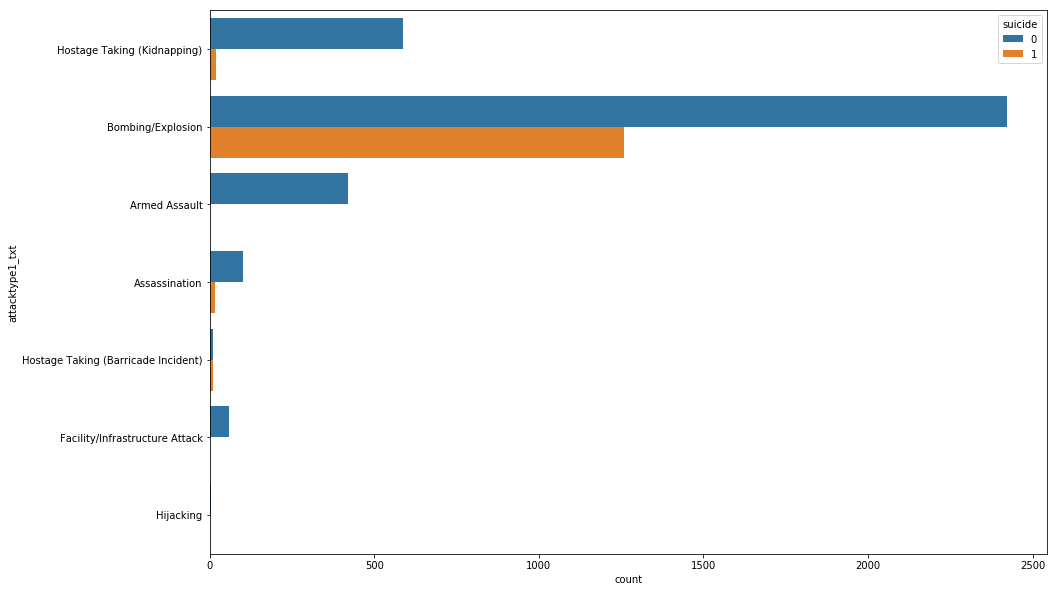

In [149]:
# As above, ISIL or ISIS is most activity terrorist group.
# Let see some kind of attack type which they often use.

plt.subplots(figsize=(15,10))
atk_type = terr[(terr['gname'] == 'Islamic State of Iraq and the Levant (ISIL)') & (terr['attacktype1_txt'] != 'Unknown')]#['attacktype1_txt'].value_counts().plot(kind='barh')
sns.countplot(y='attacktype1_txt', hue='suicide', data=atk_type)

Let check out which region is safest.

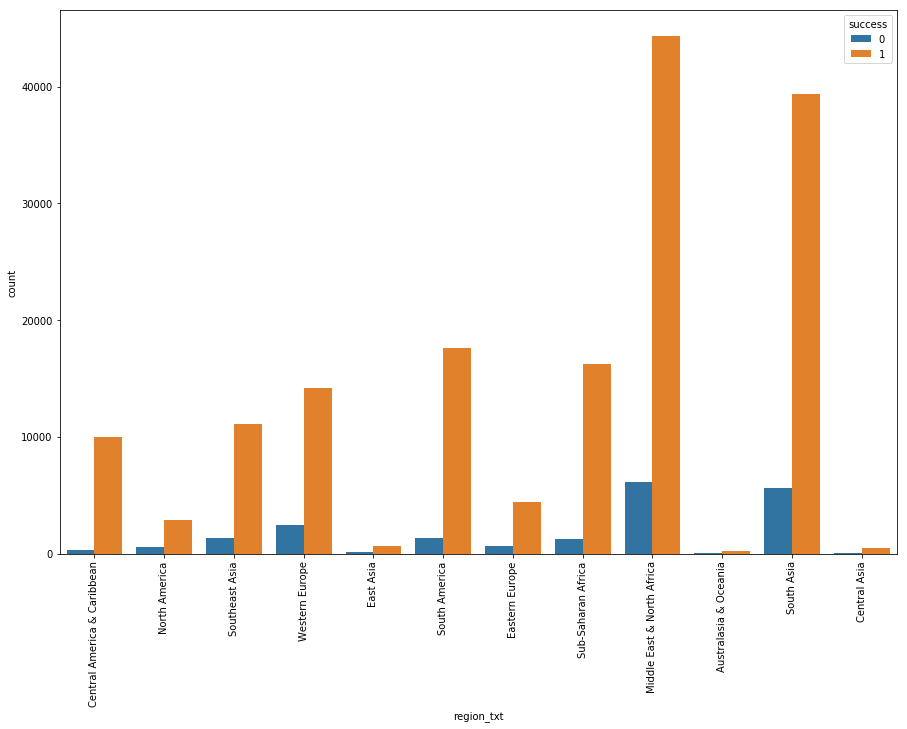

In [85]:
plt.subplots(figsize=(15,10))
region_chart = sns.countplot(x='region_txt', hue='success', data=terr);
region_chart.set_xticklabels(region_chart.get_xticklabels(),rotation=90);

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


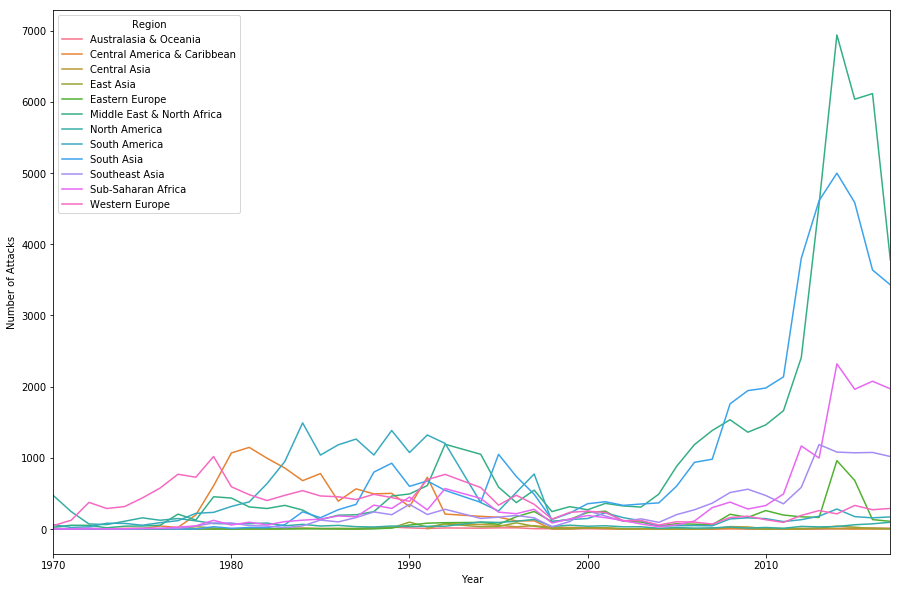

In [84]:
plt.subplots(figsize=(15,10))
region_atk = terr.groupby(['region_txt', 'iyear'])['iyear'].count()
region_atk = pd.DataFrame(region_atk)
region_atk.reset_index(level=0,inplace=True)
region_atk.columns = ['Region', 'Number of Attacks']
region_atk.reset_index(level=0,inplace=True)
region_atk['dummy']=0
region_atk_plot = sns.tsplot(time='iyear', value='Number of Attacks', condition='Region', data=region_atk, unit='dummy')
region_atk_plot.set_xlabel('Year')
plt.show();



What is the most dangerous country in 2017?

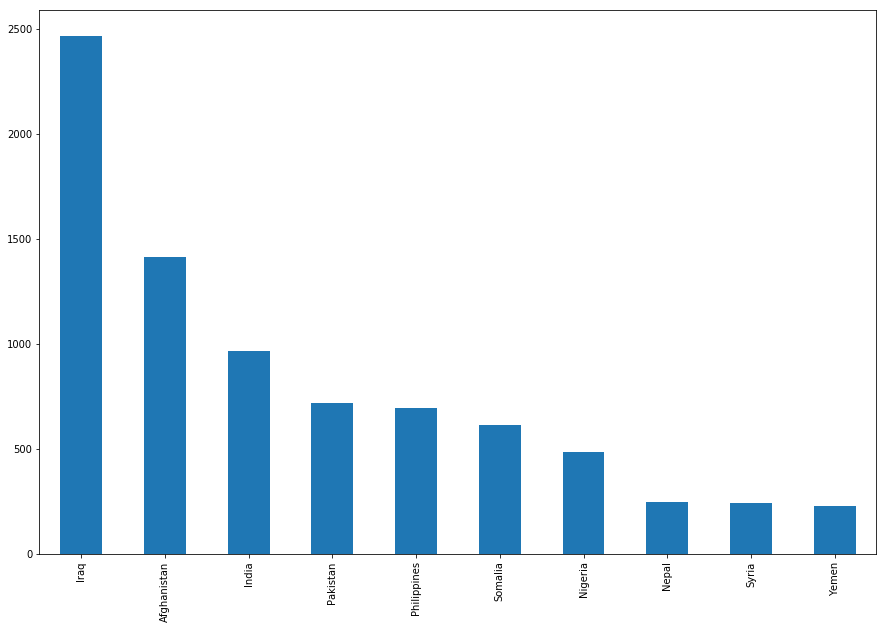

In [120]:
plt.subplots(figsize=(15,10))
terr[terr['iyear']==2017]['country_txt'].value_counts(sort=True).head(10).plot(kind='bar');

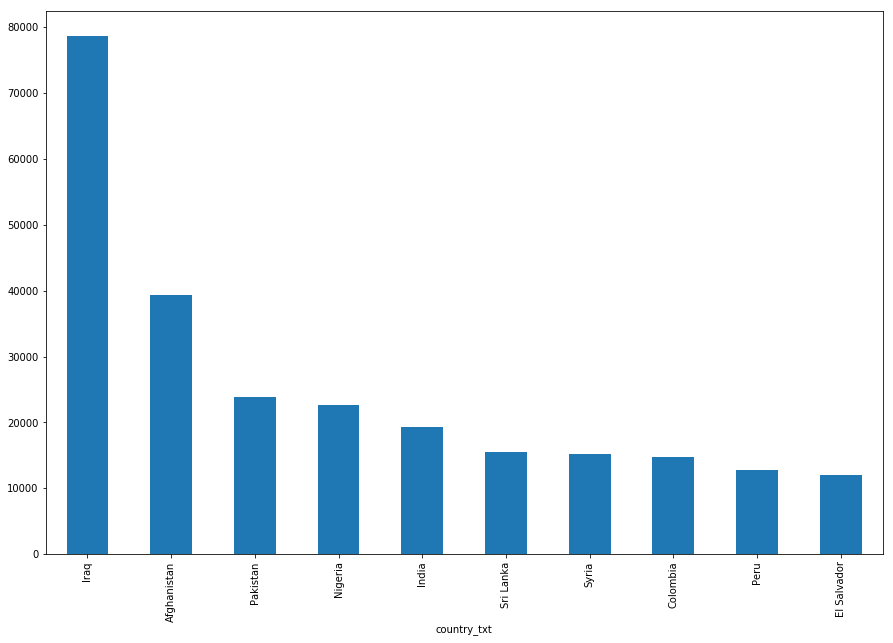

In [121]:
plt.subplots(figsize=(15,10))
terr.groupby('country_txt')['nkill'].sum().sort_values(ascending=False).head(10).plot(kind='bar');